# Temperature and salt concentration
Peter Attia

This notebook plots the first cycle of carbon black electrodes under different temperatures and times. 

Note that I recollected the data for 30 deg C, 1.0m separately for each series of experiments, so that overlapping result has some cell-to-cell variation between the two experiments.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Set plotting settings:

In [2]:
fig_width = 3.25 #ECS spec is 3.25" width
fig_height = (3/4)*fig_width # standard ratio
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 7
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

figpath = Path.cwd().parent / 'figures'

## Load temperature data

In [3]:
df_temp = pd.read_excel('2017-11-02 first-cycle temperature.xlsx', header=1, sheet_name=None)
keys_temp = list(df_temp.keys())

In [4]:
df_temp[keys_temp[0]].head()

,Capacity/mA.h/g,Ewe/V
0,0.000001,2.53120
1,0.000054,2.53018
2,0.000701,2.52915
3,0.001503,2.52812
4,0.002255,2.52709


## Load salt data

In [5]:
df_salt = pd.read_excel('2017-05-24 salt concentration data.xlsx', header=1, sheet_name=None)
keys_salt = list(df_salt.keys())
keys_salt

['0.5m', '0.5m 2', '1m', '1m 2', '2m', '2m 2', '3m', '3m 2', '4m', '4m 2']

In [6]:
df_salt[keys_salt[0]].head()

,Capacity/mA.h/g,Ecell/V
0,0.0,0.881536
1,0.0,0.963799
2,0.0,0.998374
3,0.0,1.021020
4,0.0,1.038150


## Create plot

30°C 0.9039876383616381 217.27816983017115
40°C 0.9711736153846146 267.1891308691296
50°C 1.033491728271729 308.50188711288905
60°C 1.0991028471528483 437.56277122877214
80°C 1.1982168331668346 611.840911088918

0.5m 0.9583258492950391 225.7518119991251
1.0m 0.9515784781514255 239.9678405870228
2.0m 0.9192742102788086 225.73261671664238
3.0m 0.8916870420824435 275.747211025468
4.0m 0.8534569001571076 288.6413192588185


/Users/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:221: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


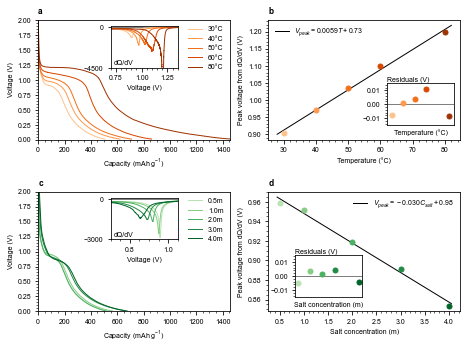

In [7]:
fig, ax = plt.subplots(figsize=(fig_width*2, fig_height*2), nrows=2, ncols=2)
ax = ax.ravel()

# Set main axes labels
ax[0].set_title('a', loc='left', weight='bold')
ax[1].set_title('b', loc='left', weight='bold')
ax[2].set_title('c', loc='left', weight='bold')
ax[3].set_title('d', loc='left', weight='bold')

ax[0].set_xlabel('Capacity (mAh g$^{-1}$)')
ax[1].set_xlabel('Temperature (°C)')
ax[2].set_xlabel('Capacity (mAh g$^{-1}$)')
ax[3].set_xlabel('Salt concentration (m)')
ax[0].set_ylabel('Voltage (V)')
ax[1].set_ylabel('Peak voltage from dQ/dV (V)')
ax[2].set_ylabel('Voltage (V)')
ax[3].set_ylabel('Peak voltage from dQ/dV (V)')

ax[0].set_xlim([0, 1455])
ax[2].set_xlim([0, 1455])
ax[0].set_ylim([0, 2.0])
ax[2].set_ylim([0, 2.0])
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[2].xaxis.set_minor_locator(AutoMinorLocator())
ax[3].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[2].yaxis.set_minor_locator(AutoMinorLocator())
ax[3].yaxis.set_minor_locator(AutoMinorLocator())

# Create and set inset properties
ax_inset0 = inset_axes(ax[0], width='100%', height='100%',
                       bbox_to_anchor=(0.36, 0.63, 0.35, 0.35),
                       bbox_transform=ax[0].transAxes,
                       loc='upper left')
ax_inset1 = inset_axes(ax[1], width='100%', height='100%',
                       bbox_to_anchor=(0.6, 0.15, 0.35, 0.35),
                       bbox_transform=ax[1].transAxes,
                       loc='upper left')
ax_inset2 = inset_axes(ax[2], width='100%', height='100%',
                       bbox_to_anchor=(0.36, 0.63, 0.35, 0.35),
                       bbox_transform=ax[2].transAxes,
                       loc='upper left')
ax_inset3 = inset_axes(ax[3], width='100%', height='100%',
                       bbox_to_anchor=(0.12, 0.15, 0.35, 0.35),
                       bbox_transform=ax[3].transAxes,
                       loc='upper left')
ax_inset0.set_xlabel('Voltage (V)')
ax_inset1.set_xlabel('Temperature (°C)')
ax_inset2.set_xlabel('Voltage (V)')
ax_inset3.set_xlabel('Salt concentration (m)')
ax_inset0.annotate('dQ/dV', (0.05, 0.05), xycoords='axes fraction',
                   horizontalalignment='left', verticalalignment='bottom')
ax_inset2.annotate('dQ/dV', (0.05, 0.05), xycoords='axes fraction',
                   horizontalalignment='left', verticalalignment='bottom')
ax_inset0.set_xlim([0.7, 1.35])
ax_inset1.set_xlim([26, 84])
ax_inset2.set_xlim([0.7, 1.05])
ax_inset0.xaxis.set_minor_locator(AutoMinorLocator())
ax_inset1.xaxis.set_minor_locator(AutoMinorLocator())
ax_inset2.xaxis.set_minor_locator(AutoMinorLocator())
ax_inset3.xaxis.set_minor_locator(AutoMinorLocator())

ax_inset0.set_ylim([-4500, 100])
ax_inset2.set_ylim([-3000, 100])
ax_inset1.set_ylim([-0.015, 0.015])
ax_inset3.set_ylim([-0.015, 0.015])
ax_inset0.get_yaxis().set_ticks([-4500, 0])
ax_inset2.get_yaxis().set_ticks([-3000, 0])
ax_inset0.axhline(0, color='tab:gray')
ax_inset1.axhline(0, color='tab:gray')
ax_inset2.axhline(0, color='tab:gray')
ax_inset3.axhline(0, color='tab:gray')

ax_inset1.yaxis.set_minor_locator(AutoMinorLocator())
ax_inset3.yaxis.set_minor_locator(AutoMinorLocator())

ax_inset1.set_title('Residuals (V)', loc='left', fontsize=7, pad=1.5)
ax_inset3.set_title('Residuals (V)', loc='left', fontsize=7, pad=1.5)


ax_inset1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax_inset3.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

## TEMPERATURE

colors = cm.Oranges(np.linspace(0.3, 0.9, 5))[:,0:3]

temps = []
V_peaks = []

for k, key in enumerate(keys_temp):
    group = df_temp[key]
    label = key[1:] + '°C'
    
    # Get Q and V
    Q = group['Capacity/mA.h/g']
    V = group['Ewe/V']
    
    # Filter
    Q_filt = savgol_filter(Q, 1001, 1)
    V_filt = savgol_filter(V, 1001, 1)
    
    dQdV = np.gradient(Q_filt, V_filt)
    
    # Get V_peak
    idx1pt2 = np.where(V_filt < 1.2)[0][0]
    idx0pt5 = np.where(V_filt < 0.5)[0][0]
    peak_idx, _ = find_peaks(-dQdV[idx1pt2:idx0pt5], distance=1e7)
    peak_idx = idx1pt2 + peak_idx[0]
        
    V_peak = V_filt[peak_idx]
    dQdV_peak = dQdV[peak_idx]
    
    # Get Q > 0.5 V
    Q_above0pt5V = np.max(Q_filt[:idx0pt5])
    
    print(label, V_peak, Q_above0pt5V)
    temps.append(int(key[1:]))
    V_peaks.append(V_peak)
    
    ax[0].plot(Q, V, color=colors[k], label=label)
    ax_inset0.plot(V_filt, dQdV, color=colors[k])
    ax[1].plot(int(key[1:]), V_peak, 'o', color=colors[k])
    
ax[0].legend()

temps_linspace = np.linspace(28, 82, 100)
p = np.polyfit(temps, V_peaks, 1)
residuals = np.array(V_peaks) - (np.array(temps)*p[0] + p[1])

eqn_label = '$V_{peak}=%.4f' % p[0] + 'T + %.2f$' % p[1]

ax[1].plot(temps_linspace, temps_linspace*p[0] + p[1],
           'k', zorder=0, label=eqn_label)

for k, temp in enumerate(temps):
    ax_inset1.plot(temp, residuals[k], 'o', color=colors[k])

print()

ax[1].legend()

## SALT

colors = cm.Greens(np.linspace(0.3, 0.9, 5))[:,0:3]

cell_indices_to_keep = [1, 2, 4, 7, 8] # Arbitrarily chosen
labels = ['0.5m', '1.0m', '2.0m', '3.0m', '4.0m']

concentrations = []
V_peaks = []

for k, index in enumerate(cell_indices_to_keep):
    key = keys_salt[index]
    group = df_salt[key]
    
    # First cycle index
    idx = group[(group['Capacity/mA.h/g'].diff() < -1)].iloc[0].name
    
    concentration = float(key[:key.find('m')])
    
    # Get Q and V
    Q = group['Capacity/mA.h/g'].iloc[:idx]
    V = group['Ecell/V'].iloc[:idx]
    
    # Filter
    Q_filt = savgol_filter(Q, 1001, 3)
    V_filt = savgol_filter(V, 1001, 3)

    dQdV = np.gradient(Q_filt, V_filt)
    
    # Get V_peak
    idx1pt2 = np.where(V_filt < 1.2)[0][0]
    idx0pt5 = np.where(V_filt < 0.5)[0][0]
    peak_idx, _ = find_peaks(-dQdV[idx1pt2:idx0pt5], distance=1e7)
    peak_idx = idx1pt2 + peak_idx[0]
    
    V_peak = V_filt[peak_idx]
    dQdV_peak = dQdV[peak_idx]
    
    # Get Q > 0.5 V
    Q_above0pt5V = np.max(Q_filt[:idx0pt5])
    
    print(str(concentration)+'m', V_peak, Q_above0pt5V)
    concentrations.append(concentration)
    V_peaks.append(V_peak)
    
    # Plots
    ax[2].plot(Q, V, color=colors[k], label=labels[k])
    ax_inset2.plot(V_filt, dQdV, color=colors[k])
    ax[3].plot(concentration, V_peak, 'o', color=colors[k])
    
ax[2].legend()

concentrations_linspace = np.linspace(0.45, 4.05, 100)
p = np.polyfit(concentrations, V_peaks, 1)
residuals = np.array(V_peaks) - (np.array(concentrations)*p[0] + p[1])

eqn_label = '$V_{peak}=%.3f' % p[0] + 'C_{salt} + %.2f$' % p[1]

ax[3].plot(concentrations_linspace, concentrations_linspace*p[0] + p[1],
           'k', zorder=0, label=eqn_label)

for k, temp in enumerate(temps):
    ax_inset3.plot(temp, residuals[k], 'o', color=colors[k])

ax[3].legend()
    
plt.tight_layout()
plt.savefig(figpath / 'temp_and_salt.eps', bbox_inches='tight', format='eps')